In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoModel

# 모델과 토크나이저를 한 번만 로드
model = AutoModel.from_pretrained(
    "jinaai/jina-embeddings-v3", trust_remote_code=True
).cuda()


def get_embeddings(texts):
    if not isinstance(texts, list):
        texts = [texts]
    embeddings = model.encode(texts, task="text-matching")
    return embeddings


compare_abstract = {
    "Ablating Concepts in Text-to-Image Diffusion Models": "Large-scale text-to-image diffusion models can generate high-fidelity images with powerful compositional ability. However, these models are typically trained on an enormous amount of Internet data, often containing copyrighted material, licensed images, and personal photos. Furthermore, they have been found to replicate the style of various living artists or memorize exact training samples. How can we remove such copyrighted concepts or images without retraining the model from scratch? To achieve this goal, we propose an efficient method of ablating concepts in the pretrained model, i.e., preventing the generation of a target concept. Our algorithm learns to match the image distribution for a target style, instance, or text prompt we wish to ablate to the distribution corresponding to an anchor concept. This prevents the model from generating target concepts given its text condition. Extensive experiments show that our method can successfully prevent the generation of the ablated concept while preserving closely related concepts in the model.",
    "Erasing Concepts from Diffusion Models": "Motivated by recent advancements in text-to-image diffusion, we study erasure of specific concepts from the model's weights. While Stable Diffusion has shown promise in producing explicit or realistic artwork, it has raised concerns regarding its potential for misuse. We propose a fine-tuning method that can erase a visual concept from a pre-trained diffusion model, given only the name of the style and using negative guidance as a teacher. We benchmark our method against previous approaches that remove sexually explicit content and demonstrate its effectiveness, performing on par with Safe Latent Diffusion and censored training. To evaluate artistic style removal, we conduct experiments erasing five modern artists from the network and conduct a user study to assess the human perception of the removed styles. Unlike previous methods, our approach can remove concepts from a diffusion model permanently rather than modifying the output at the inference time, so it cannot be circumvented even if a user has access to model weights. Our code, data, and results are available at this https URL",
    "Forget-Me-Not: Learning to Forget in Text-to-Image Diffusion Models": "The unlearning problem of deep learning models, once primarily an academic concern, has become a prevalent issue in the industry. The significant advances in text-to-image generation techniques have prompted global discussions on privacy, copyright, and safety, as numerous unauthorized personal IDs, content, artistic creations, and potentially harmful materials have been learned by these models and later utilized to generate and distribute uncontrolled content. To address this challenge, we propose \textbf{Forget-Me-Not}, an efficient and low-cost solution designed to safely remove specified IDs, objects, or styles from a well-configured text-to-image model in as little as 30 seconds, without impairing its ability to generate other content. Alongside our method, we introduce the \textbf{Memorization Score (M-Score)} and \textbf{ConceptBench} to measure the models' capacity to generate general concepts, grouped into three primary categories: ID, object, and style. Using M-Score and ConceptBench, we demonstrate that Forget-Me-Not can effectively eliminate targeted concepts while maintaining the model's performance on other concepts. Furthermore, Forget-Me-Not offers two practical extensions: a) removal of potentially harmful or NSFW content, and b) enhancement of model accuracy, inclusion and diversity through \textbf{concept correction and disentanglement}. It can also be adapted as a lightweight model patch for Stable Diffusion, allowing for concept manipulation and convenient distribution. To encourage future research in this critical area and promote the development of safe and inclusive generative models, we will open-source our code and ConceptBench at \href{this https URL}{this https URL}.",
    "MACE: Mass Concept Erasure in Diffusion Models": "The rapid expansion of large-scale text-to-image diffusion models has raised growing concerns regarding their potential misuse in creating harmful or misleading content. In this paper, we introduce MACE, a finetuning framework for the task of mass concept erasure. This task aims to prevent models from generating images that embody unwanted concepts when prompted. Existing concept erasure methods are typically restricted to handling fewer than five concepts simultaneously and struggle to find a balance between erasing concept synonyms (generality) and maintaining unrelated concepts (specificity). In contrast, MACE differs by successfully scaling the erasure scope up to 100 concepts and by achieving an effective balance between generality and specificity. This is achieved by leveraging closed-form cross-attention refinement along with LoRA finetuning, collectively eliminating the information of undesirable concepts. Furthermore, MACE integrates multiple LoRAs without mutual interference. We conduct extensive evaluations of MACE against prior methods across four different tasks: object erasure, celebrity erasure, explicit content erasure, and artistic style erasure. Our results reveal that MACE surpasses prior methods in all evaluated tasks. Code is available at https://github.com/Shilin-LU/MACE.",
    "ReFACT: Updating Text-to-Image Models by Editing the Text Encoder": "Our world is marked by unprecedented technological, global, and socio-political transformations, posing a significant challenge to text-to-image generative models. These models encode factual associations within their parameters that can quickly become outdated, diminishing their utility for end-users. To that end, we introduce ReFACT, a novel approach for editing factual associations in text-to-image models without relaying on explicit input from end-users or costly re-training. ReFACT updates the weights of a specific layer in the text encoder, modifying only a tiny portion of the model's parameters and leaving the rest of the model unaffected. We empirically evaluate ReFACT on an existing benchmark, alongside a newly curated dataset. Compared to other methods, ReFACT achieves superior performance in both generalization to related concepts and preservation of unrelated concepts. Furthermore, ReFACT maintains image generation quality, making it a practical tool for updating and correcting factual information in text-to-image models.",
    "Unified Concept Editing in Diffusion Models": "Text-to-image models suffer from various safety issues that may limit their suitability for deployment. Previous methods have separately addressed individual issues of bias, copyright, and offensive content in text-to-image models. However, in the real world, all of these issues appear simultaneously in the same model. We present a method that tackles all issues with a single approach. Our method, Unified Concept Editing (UCE), edits the model without training using a closed-form solution, and scales seamlessly to concurrent edits on text-conditional diffusion models. We demonstrate scalable simultaneous debiasing, style erasure, and content moderation by editing text-to-image projections, and we present extensive experiments demonstrating improved efficacy and scalability over prior work. Our code is available at https://unified.baulab.info",
    "Localizing and Editing Knowledge in Text-to-Image Generative Models": "Text-to-Image Diffusion Models such as Stable-Diffusion and Imagen have achieved unprecedented quality of photorealism with state-of-the-art FID scores on MS-COCO and other generation benchmarks. Given a caption, image generation requires fine-grained knowledge about attributes such as object structure, style, and viewpoint amongst others. Where does this information reside in text-to-image generative models? In our paper, we tackle this question and understand how knowledge corresponding to distinct visual attributes is stored in large-scale text-to-image diffusion models. We adapt Causal Mediation Analysis for text-to-image models and trace knowledge about distinct visual attributes to various (causal) components in the (i) UNet and (ii) text-encoder of the diffusion model. In particular, we show that unlike generative large-language models, knowledge about different attributes is not localized in isolated components, but is instead distributed amongst a set of components in the conditional UNet. These sets of components are often distinct for different visual attributes. Remarkably, we find that the CLIP text-encoder in public text-to-image models such as Stable-Diffusion contains only one causal state across different visual attributes, and this is the first self-attention layer corresponding to the last subject token of the attribute in the caption. This is in stark contrast to the causal states in other language models which are often the mid-MLP layers. Based on this observation of only one causal state in the text-encoder, we introduce a fast, data-free model editing method Diff-QuickFix which can effectively edit concepts in text-to-image models. DiffQuickFix can edit (ablate) concepts in under a second with a closed-form update, providing a significant 1000x speedup and comparable editing performance to existing fine-tuning based editing methods.",
    "R.A.C.E.: Robust Adversarial Concept Erasure for Secure Text-to-Image Diffusion Model": r"In the evolving landscape of text-to-image (T2I) diffusion models, the remarkable capability to generate high-quality images from textual descriptions faces challenges with the potential misuse of reproducing sensitive content. To address this critical issue, we introduce \textbf{R}obust \textbf{A}dversarial \textbf{C}oncept \textbf{E}rase (RACE), a novel approach designed to mitigate these risks by enhancing the robustness of concept erasure method for T2I models. RACE utilizes a sophisticated adversarial training framework to identify and mitigate adversarial text embeddings, significantly reducing the Attack Success Rate (ASR). Impressively, RACE achieves a 30 percentage point reduction in ASR for the ``nudity'' concept against the leading white-box attack method. Our extensive evaluations demonstrate RACE's effectiveness in defending against both white-box and black-box attacks, marking a significant advancement in protecting T2I diffusion models from generating inappropriate or misleading imagery. This work underlines the essential need for proactive defense measures in adapting to the rapidly advancing field of adversarial challenges. Our code is publicly available: \url{https://github.com/chkimmmmm/R.A.C.E.}",
    "Safe Latent Diffusion: Mitigating Inappropriate Degeneration in Diffusion Models": "Text-conditioned image generation models have recently achieved astonishing results in image quality and text alignment and are consequently employed in a fast-growing number of applications. Since they are highly data-driven, relying on billion-sized datasets randomly scraped from the internet, they also suffer, as we demonstrate, from degenerated and biased human behavior. In turn, they may even reinforce such biases. To help combat these undesired side effects, we present safe latent diffusion (SLD). Specifically, to measure the inappropriate degeneration due to unfiltered and imbalanced training sets, we establish a novel image generation test bed-inappropriate image prompts (I2P)-containing dedicated, real-world image-to-text prompts covering concepts such as nudity and violence. As our exhaustive empirical evaluation demonstrates, the introduced SLD removes and suppresses inappropriate image parts during the diffusion process, with no additional training required and no adverse effect on overall image quality or text alignment.",
    "SalUn: Empowering Machine Unlearning via Gradient-based Weight Saliency in Both Image Classification and Generation": "With evolving data regulations, machine unlearning (MU) has become an important tool for fostering trust and safety in today's AI models. However, existing MU methods focusing on data and/or weight perspectives often suffer limitations in unlearning accuracy, stability, and cross-domain applicability. To address these challenges, we introduce the concept of 'weight saliency' for MU, drawing parallels with input saliency in model explanation. This innovation directs MU's attention toward specific model weights rather than the entire model, improving effectiveness and efficiency. The resultant method that we call saliency unlearning (SalUn) narrows the performance gap with 'exact' unlearning (model retraining from scratch after removing the forgetting data points). To the best of our knowledge, SalUn is the first principled MU approach that can effectively erase the influence of forgetting data, classes, or concepts in both image classification and generation tasks. As highlighted below, For example, SalUn yields a stability advantage in high-variance random data forgetting, e.g., with a 0.2% gap compared to exact unlearning on the CIFAR-10 dataset. Moreover, in preventing conditional diffusion models from generating harmful images, SalUn achieves nearly 100% unlearning accuracy, outperforming current state-of-the-art baselines like Erased Stable Diffusion and Forget-Me-Not. Codes are available at https://github.com/OPTML-Group/Unlearn-Saliency. (WARNING: This paper contains model outputs that may be offensive in nature.)",
    "Receler: Reliable Concept Erasing of Text-to-Image Diffusion Models via Lightweight Erasers": "Concept erasure in text-to-image diffusion models aims to disable pre-trained diffusion models from generating images related to a target concept. To perform reliable concept erasure, the properties of robustness and locality are desirable. The former refrains the model from producing images associated with the target concept for any paraphrased or learned prompts, while the latter preserves its ability in generating images with non-target concepts. In this paper, we propose Reliable Concept Erasing via Lightweight Erasers (Receler). It learns a lightweight Eraser to perform concept erasing while satisfying the above desirable properties through the proposed concept-localized regularization and adversarial prompt learning scheme. Experiments with various concepts verify the superiority of Receler over previous methods.",
    "Direct Unlearning Optimization for Robust and Safe Text-to-Image Models": "Recent advancements in text-to-image (T2I) models have greatly benefited from large-scale datasets, but they also pose significant risks due to the potential generation of unsafe content. To mitigate this issue, researchers proposed unlearning techniques that attempt to induce the model to unlearn potentially harmful prompts. However, these methods are easily bypassed by adversarial attacks, making them unreliable for ensuring the safety of generated images. In this paper, we propose Direct Unlearning Optimization (DUO), a novel framework for removing NSFW content from T2I models while preserving their performance on unrelated topics. DUO employs a preference optimization approach using curated paired image data, ensuring that the model learns to remove unsafe visual concepts while retain unrelated features. Furthermore, we introduce an output-preserving regularization term to maintain the model's generative capabilities on safe content. Extensive experiments demonstrate that DUO can robustly defend against various state-of-the-art red teaming methods without significant performance degradation on unrelated topics, as measured by FID and CLIP scores. Our work contributes to the development of safer and more reliable T2I models, paving the way for their responsible deployment in both closed-source and open-source scenarios.",
    "Leveraging Catastrophic Forgetting to Develop Safe Diffusion Models against Malicious Finetuning": "Diffusion models (DMs) have demonstrated remarkable proficiency in producing images based on textual prompts. Numerous methods have been proposed to ensure these models generate safe images. Early methods attempt to incorporate safety filters into models to mitigate the risk of generating harmful images but such external filters do not inherently detoxify the model and can be easily bypassed. Hence, model unlearning and data cleaning are the most essential methods for maintaining the safety of models, given their impact on model parameters. However, malicious fine-tuning can still make models prone to generating harmful or undesirable images even with these methods. Inspired by the phenomenon of catastrophic forgetting, we propose a training policy using contrastive learning to increase the latent space distance between clean and harmful data distribution, thereby protecting models from being fine-tuned to generate harmful images due to forgetting. The experimental results demonstrate that our methods not only maintain clean image generation capabilities before malicious fine-tuning but also effectively prevent DMs from producing harmful images after malicious fine-tuning. Our method can also be combined with other safety methods to maintain their safety against malicious fine-tuning further.",
    "Unlearning or Concealment? A Critical Analysis and Evaluation Metrics for Unlearning in Diffusion Models": "Recent research has seen significant interest in methods for concept removal and targeted forgetting in diffusion models. In this paper, we conduct a comprehensive white-box analysis to expose significant vulnerabilities in existing diffusion model unlearning methods. We show that the objective functions used for unlearning in the existing methods lead to decoupling of the targeted concepts (meant to be forgotten) for the corresponding prompts. This is concealment and not actual unlearning, which was the original goal. The ineffectiveness of current methods stems primarily from their narrow focus on reducing generation probabilities for specific prompt sets, neglecting the diverse modalities of intermediate guidance employed during the inference process. The paper presents a rigorous theoretical and empirical examination of four commonly used techniques for unlearning in diffusion models. We introduce two new evaluation metrics: Concept Retrieval Score (CRS) and Concept Confidence Score (CCS). These metrics are based on a successful adversarial attack setup that can recover forgotten concepts from unlearned diffusion models. The CRS measures the similarity between the latent representations of the unlearned and fully trained models after unlearning. It reports the extent of retrieval of the forgotten concepts with increasing amount of guidance. The CCS quantifies the confidence of the model in assigning the target concept to the manipulated data. It reports the probability of the unlearned model's generations to be aligned with the original domain knowledge with increasing amount of guidance. Evaluating existing unlearning methods with our proposed stringent metrics for diffusion models reveals significant shortcomings in their ability to truly unlearn concepts. Source Code: https://respailab.github.io/unlearning-or-concealment",
    "UnlearnCanvas: Stylized Image Dataset for Enhanced Machine Unlearning Evaluation in Diffusion Models": "The technological advancements in diffusion models (DMs) have demonstrated unprecedented capabilities in text-to-image generation and are widely used in diverse applications. However, they have also raised significant societal concerns, such as the generation of harmful content and copyright disputes. Machine unlearning (MU) has emerged as a promising solution, capable of removing undesired generative capabilities from DMs. However, existing MU evaluation systems present several key challenges that can result in incomplete and inaccurate assessments. To address these issues, we propose UnlearnCanvas, a comprehensive high-resolution stylized image dataset that facilitates the evaluation of the unlearning of artistic styles and associated objects. This dataset enables the establishment of a standardized, automated evaluation framework with 7 quantitative metrics assessing various aspects of the unlearning performance for DMs. Through extensive experiments, we benchmark 9 state-of-the-art MU methods for DMs, revealing novel insights into their strengths, weaknesses, and underlying mechanisms. Additionally, we explore challenging unlearning scenarios for DMs to evaluate worst-case performance against adversarial prompts, the unlearning of finer-scale concepts, and sequential unlearning. We hope that this study can pave the way for developing more effective, accurate, and robust DM unlearning methods, ensuring safer and more ethical applications of DMs in the future. The dataset, benchmark, and codes are publicly available at https://unlearn-canvas.netlify.app/.",
    "Self-Discovering Interpretable Diffusion Latent Directions for Responsible Text-to-Image Generation": r"Diffusion-based models have gained significant popularity for text-to-image generation due to their exceptional image-generation capabilities. A risk with these models is the potential generation of inappropriate content, such as biased or harmful images. However, the underlying reasons for generating such undesired content from the perspective of the diffusion model's internal representation remain unclear. Previous work interprets vectors in an interpretable latent space of diffusion models as semantic concepts. However, existing approaches cannot discover directions for arbitrary concepts, such as those related to inappropriate concepts. In this work, we propose a novel self-supervised approach to find interpretable latent directions for a given concept. With the discovered vectors, we further propose a simple approach to mitigate inappropriate generation. Extensive experiments have been conducted to verify the effectiveness of our mitigation approach, namely, for fair generation, safe generation, and responsible text-enhancing generation. Project page: \url{this https URL}.",
}

compare_list = list(compare_abstract.values())

compare_embeddings = get_embeddings(compare_list)

similarity_matrix = compare_embeddings @ compare_embeddings.T

<Axes: >

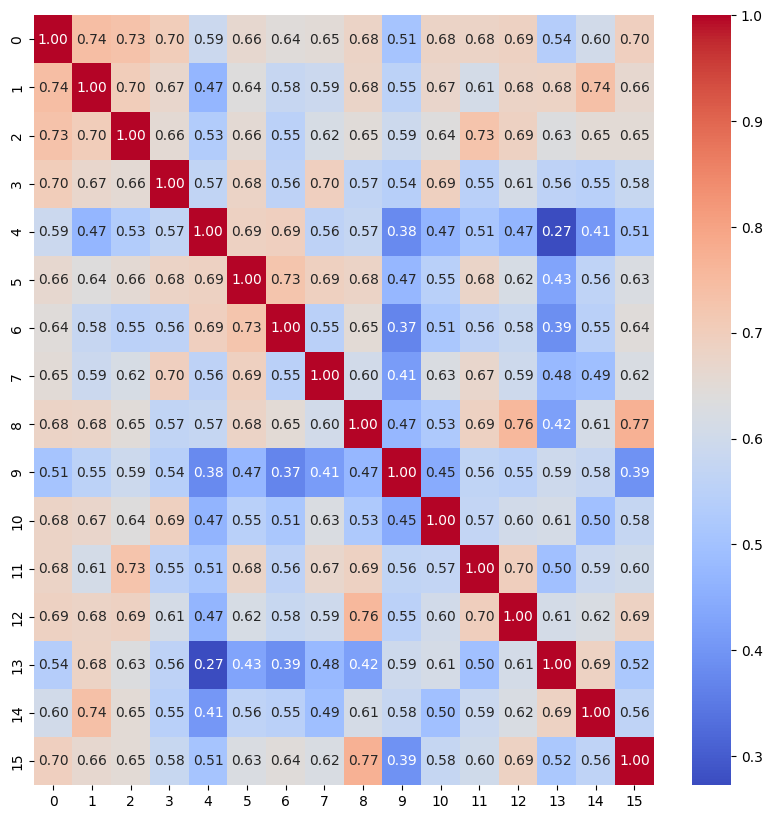

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="coolwarm")

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sentence_transformers import SentenceTransformer

compare_abstract = {
    "Ablating Concepts in Text-to-Image Diffusion Models": "Large-scale text-to-image diffusion models can generate high-fidelity images with powerful compositional ability. However, these models are typically trained on an enormous amount of Internet data, often containing copyrighted material, licensed images, and personal photos. Furthermore, they have been found to replicate the style of various living artists or memorize exact training samples. How can we remove such copyrighted concepts or images without retraining the model from scratch? To achieve this goal, we propose an efficient method of ablating concepts in the pretrained model, i.e., preventing the generation of a target concept. Our algorithm learns to match the image distribution for a target style, instance, or text prompt we wish to ablate to the distribution corresponding to an anchor concept. This prevents the model from generating target concepts given its text condition. Extensive experiments show that our method can successfully prevent the generation of the ablated concept while preserving closely related concepts in the model.",
    "Erasing Concepts from Diffusion Models": "Motivated by recent advancements in text-to-image diffusion, we study erasure of specific concepts from the model's weights. While Stable Diffusion has shown promise in producing explicit or realistic artwork, it has raised concerns regarding its potential for misuse. We propose a fine-tuning method that can erase a visual concept from a pre-trained diffusion model, given only the name of the style and using negative guidance as a teacher. We benchmark our method against previous approaches that remove sexually explicit content and demonstrate its effectiveness, performing on par with Safe Latent Diffusion and censored training. To evaluate artistic style removal, we conduct experiments erasing five modern artists from the network and conduct a user study to assess the human perception of the removed styles. Unlike previous methods, our approach can remove concepts from a diffusion model permanently rather than modifying the output at the inference time, so it cannot be circumvented even if a user has access to model weights. Our code, data, and results are available at this https URL",
    "Forget-Me-Not: Learning to Forget in Text-to-Image Diffusion Models": "The unlearning problem of deep learning models, once primarily an academic concern, has become a prevalent issue in the industry. The significant advances in text-to-image generation techniques have prompted global discussions on privacy, copyright, and safety, as numerous unauthorized personal IDs, content, artistic creations, and potentially harmful materials have been learned by these models and later utilized to generate and distribute uncontrolled content. To address this challenge, we propose \textbf{Forget-Me-Not}, an efficient and low-cost solution designed to safely remove specified IDs, objects, or styles from a well-configured text-to-image model in as little as 30 seconds, without impairing its ability to generate other content. Alongside our method, we introduce the \textbf{Memorization Score (M-Score)} and \textbf{ConceptBench} to measure the models' capacity to generate general concepts, grouped into three primary categories: ID, object, and style. Using M-Score and ConceptBench, we demonstrate that Forget-Me-Not can effectively eliminate targeted concepts while maintaining the model's performance on other concepts. Furthermore, Forget-Me-Not offers two practical extensions: a) removal of potentially harmful or NSFW content, and b) enhancement of model accuracy, inclusion and diversity through \textbf{concept correction and disentanglement}. It can also be adapted as a lightweight model patch for Stable Diffusion, allowing for concept manipulation and convenient distribution. To encourage future research in this critical area and promote the development of safe and inclusive generative models, we will open-source our code and ConceptBench at \href{this https URL}{this https URL}.",
    "MACE: Mass Concept Erasure in Diffusion Models": "The rapid expansion of large-scale text-to-image diffusion models has raised growing concerns regarding their potential misuse in creating harmful or misleading content. In this paper, we introduce MACE, a finetuning framework for the task of mass concept erasure. This task aims to prevent models from generating images that embody unwanted concepts when prompted. Existing concept erasure methods are typically restricted to handling fewer than five concepts simultaneously and struggle to find a balance between erasing concept synonyms (generality) and maintaining unrelated concepts (specificity). In contrast, MACE differs by successfully scaling the erasure scope up to 100 concepts and by achieving an effective balance between generality and specificity. This is achieved by leveraging closed-form cross-attention refinement along with LoRA finetuning, collectively eliminating the information of undesirable concepts. Furthermore, MACE integrates multiple LoRAs without mutual interference. We conduct extensive evaluations of MACE against prior methods across four different tasks: object erasure, celebrity erasure, explicit content erasure, and artistic style erasure. Our results reveal that MACE surpasses prior methods in all evaluated tasks. Code is available at https://github.com/Shilin-LU/MACE.",
    "Selective Amnesia: A Continual Learning Approach to Forgetting in Deep Generative Models": "The recent proliferation of large-scale text-to-image models has led to growing concerns that such models may be misused to generate harmful, misleading, and inappropriate content. Motivated by this issue, we derive a technique inspired by continual learning to selectively forget concepts in pretrained deep generative models. Our method, dubbed Selective Amnesia, enables controllable forgetting where a user can specify how a concept should be forgotten. Selective Amnesia can be applied to conditional variational likelihood models, which encompass a variety of popular deep generative frameworks, including variational autoencoders and large-scale text-to-image diffusion models. Experiments across different models demonstrate that our approach induces forgetting on a variety of concepts, from entire classes in standard datasets to celebrity and nudity prompts in text-to-image models. Our code is publicly available at https://github.com/clear-nus/selective-amnesia.",
    "Unified Concept Editing in Diffusion Models": "Text-to-image models suffer from various safety issues that may limit their suitability for deployment. Previous methods have separately addressed individual issues of bias, copyright, and offensive content in text-to-image models. However, in the real world, all of these issues appear simultaneously in the same model. We present a method that tackles all issues with a single approach. Our method, Unified Concept Editing (UCE), edits the model without training using a closed-form solution, and scales seamlessly to concurrent edits on text-conditional diffusion models. We demonstrate scalable simultaneous debiasing, style erasure, and content moderation by editing text-to-image projections, and we present extensive experiments demonstrating improved efficacy and scalability over prior work. Our code is available at https://unified.baulab.info",
    "Localizing and Editing Knowledge in Text-to-Image Generative Models": "Text-to-Image Diffusion Models such as Stable-Diffusion and Imagen have achieved unprecedented quality of photorealism with state-of-the-art FID scores on MS-COCO and other generation benchmarks. Given a caption, image generation requires fine-grained knowledge about attributes such as object structure, style, and viewpoint amongst others. Where does this information reside in text-to-image generative models? In our paper, we tackle this question and understand how knowledge corresponding to distinct visual attributes is stored in large-scale text-to-image diffusion models. We adapt Causal Mediation Analysis for text-to-image models and trace knowledge about distinct visual attributes to various (causal) components in the (i) UNet and (ii) text-encoder of the diffusion model. In particular, we show that unlike generative large-language models, knowledge about different attributes is not localized in isolated components, but is instead distributed amongst a set of components in the conditional UNet. These sets of components are often distinct for different visual attributes. Remarkably, we find that the CLIP text-encoder in public text-to-image models such as Stable-Diffusion contains only one causal state across different visual attributes, and this is the first self-attention layer corresponding to the last subject token of the attribute in the caption. This is in stark contrast to the causal states in other language models which are often the mid-MLP layers. Based on this observation of only one causal state in the text-encoder, we introduce a fast, data-free model editing method Diff-QuickFix which can effectively edit concepts in text-to-image models. DiffQuickFix can edit (ablate) concepts in under a second with a closed-form update, providing a significant 1000x speedup and comparable editing performance to existing fine-tuning based editing methods.",
    "R.A.C.E.: Robust Adversarial Concept Erasure for Secure Text-to-Image Diffusion Model": r"In the evolving landscape of text-to-image (T2I) diffusion models, the remarkable capability to generate high-quality images from textual descriptions faces challenges with the potential misuse of reproducing sensitive content. To address this critical issue, we introduce \textbf{R}obust \textbf{A}dversarial \textbf{C}oncept \textbf{E}rase (RACE), a novel approach designed to mitigate these risks by enhancing the robustness of concept erasure method for T2I models. RACE utilizes a sophisticated adversarial training framework to identify and mitigate adversarial text embeddings, significantly reducing the Attack Success Rate (ASR). Impressively, RACE achieves a 30 percentage point reduction in ASR for the ``nudity'' concept against the leading white-box attack method. Our extensive evaluations demonstrate RACE's effectiveness in defending against both white-box and black-box attacks, marking a significant advancement in protecting T2I diffusion models from generating inappropriate or misleading imagery. This work underlines the essential need for proactive defense measures in adapting to the rapidly advancing field of adversarial challenges. Our code is publicly available: \url{https://github.com/chkimmmmm/R.A.C.E.}",
    "Safe Latent Diffusion: Mitigating Inappropriate Degeneration in Diffusion Models": "Text-conditioned image generation models have recently achieved astonishing results in image quality and text alignment and are consequently employed in a fast-growing number of applications. Since they are highly data-driven, relying on billion-sized datasets randomly scraped from the internet, they also suffer, as we demonstrate, from degenerated and biased human behavior. In turn, they may even reinforce such biases. To help combat these undesired side effects, we present safe latent diffusion (SLD). Specifically, to measure the inappropriate degeneration due to unfiltered and imbalanced training sets, we establish a novel image generation test bed-inappropriate image prompts (I2P)-containing dedicated, real-world image-to-text prompts covering concepts such as nudity and violence. As our exhaustive empirical evaluation demonstrates, the introduced SLD removes and suppresses inappropriate image parts during the diffusion process, with no additional training required and no adverse effect on overall image quality or text alignment.",
    "SalUn: Empowering Machine Unlearning via Gradient-based Weight Saliency in Both Image Classification and Generation": "With evolving data regulations, machine unlearning (MU) has become an important tool for fostering trust and safety in today's AI models. However, existing MU methods focusing on data and/or weight perspectives often suffer limitations in unlearning accuracy, stability, and cross-domain applicability. To address these challenges, we introduce the concept of 'weight saliency' for MU, drawing parallels with input saliency in model explanation. This innovation directs MU's attention toward specific model weights rather than the entire model, improving effectiveness and efficiency. The resultant method that we call saliency unlearning (SalUn) narrows the performance gap with 'exact' unlearning (model retraining from scratch after removing the forgetting data points). To the best of our knowledge, SalUn is the first principled MU approach that can effectively erase the influence of forgetting data, classes, or concepts in both image classification and generation tasks. As highlighted below, For example, SalUn yields a stability advantage in high-variance random data forgetting, e.g., with a 0.2% gap compared to exact unlearning on the CIFAR-10 dataset. Moreover, in preventing conditional diffusion models from generating harmful images, SalUn achieves nearly 100% unlearning accuracy, outperforming current state-of-the-art baselines like Erased Stable Diffusion and Forget-Me-Not. Codes are available at https://github.com/OPTML-Group/Unlearn-Saliency. (WARNING: This paper contains model outputs that may be offensive in nature.)",
    "Receler: Reliable Concept Erasing of Text-to-Image Diffusion Models via Lightweight Erasers": "Concept erasure in text-to-image diffusion models aims to disable pre-trained diffusion models from generating images related to a target concept. To perform reliable concept erasure, the properties of robustness and locality are desirable. The former refrains the model from producing images associated with the target concept for any paraphrased or learned prompts, while the latter preserves its ability in generating images with non-target concepts. In this paper, we propose Reliable Concept Erasing via Lightweight Erasers (Receler). It learns a lightweight Eraser to perform concept erasing while satisfying the above desirable properties through the proposed concept-localized regularization and adversarial prompt learning scheme. Experiments with various concepts verify the superiority of Receler over previous methods.",
    "Direct Unlearning Optimization for Robust and Safe Text-to-Image Models": "Recent advancements in text-to-image (T2I) models have greatly benefited from large-scale datasets, but they also pose significant risks due to the potential generation of unsafe content. To mitigate this issue, researchers proposed unlearning techniques that attempt to induce the model to unlearn potentially harmful prompts. However, these methods are easily bypassed by adversarial attacks, making them unreliable for ensuring the safety of generated images. In this paper, we propose Direct Unlearning Optimization (DUO), a novel framework for removing NSFW content from T2I models while preserving their performance on unrelated topics. DUO employs a preference optimization approach using curated paired image data, ensuring that the model learns to remove unsafe visual concepts while retain unrelated features. Furthermore, we introduce an output-preserving regularization term to maintain the model's generative capabilities on safe content. Extensive experiments demonstrate that DUO can robustly defend against various state-of-the-art red teaming methods without significant performance degradation on unrelated topics, as measured by FID and CLIP scores. Our work contributes to the development of safer and more reliable T2I models, paving the way for their responsible deployment in both closed-source and open-source scenarios.",
    "Leveraging Catastrophic Forgetting to Develop Safe Diffusion Models against Malicious Finetuning": "Diffusion models (DMs) have demonstrated remarkable proficiency in producing images based on textual prompts. Numerous methods have been proposed to ensure these models generate safe images. Early methods attempt to incorporate safety filters into models to mitigate the risk of generating harmful images but such external filters do not inherently detoxify the model and can be easily bypassed. Hence, model unlearning and data cleaning are the most essential methods for maintaining the safety of models, given their impact on model parameters. However, malicious fine-tuning can still make models prone to generating harmful or undesirable images even with these methods. Inspired by the phenomenon of catastrophic forgetting, we propose a training policy using contrastive learning to increase the latent space distance between clean and harmful data distribution, thereby protecting models from being fine-tuned to generate harmful images due to forgetting. The experimental results demonstrate that our methods not only maintain clean image generation capabilities before malicious fine-tuning but also effectively prevent DMs from producing harmful images after malicious fine-tuning. Our method can also be combined with other safety methods to maintain their safety against malicious fine-tuning further.",
    "Get What You Want, Not What You Don't: Image Content Suppression for Text-to-Image Diffusion Models": "The success of recent text-to-image diffusion models is largely due to their capacity to be guided by a complex text prompt, which enables users to precisely describe the desired content. However, these models struggle to effectively suppress the generation of undesired content, which is explicitly requested to be omitted from the generated image in the prompt. In this paper, we analyze how to manipulate the text embeddings and remove unwanted content from them. We introduce two contributions, which we refer to as $\textit{soft-weighted regularization}$ and $\textit{inference-time text embedding optimization}$. The first regularizes the text embedding matrix and effectively suppresses the undesired content. The second method aims to further suppress the unwanted content generation of the prompt, and encourages the generation of desired content. We evaluate our method quantitatively and qualitatively on extensive experiments, validating its effectiveness. Furthermore, our method is generalizability to both the pixel-space diffusion models (i.e. DeepFloyd-IF) and the latent-space diffusion models (i.e. Stable Diffusion).",
    "UnlearnCanvas: Stylized Image Dataset for Enhanced Machine Unlearning Evaluation in Diffusion Models": "The technological advancements in diffusion models (DMs) have demonstrated unprecedented capabilities in text-to-image generation and are widely used in diverse applications. However, they have also raised significant societal concerns, such as the generation of harmful content and copyright disputes. Machine unlearning (MU) has emerged as a promising solution, capable of removing undesired generative capabilities from DMs. However, existing MU evaluation systems present several key challenges that can result in incomplete and inaccurate assessments. To address these issues, we propose UnlearnCanvas, a comprehensive high-resolution stylized image dataset that facilitates the evaluation of the unlearning of artistic styles and associated objects. This dataset enables the establishment of a standardized, automated evaluation framework with 7 quantitative metrics assessing various aspects of the unlearning performance for DMs. Through extensive experiments, we benchmark 9 state-of-the-art MU methods for DMs, revealing novel insights into their strengths, weaknesses, and underlying mechanisms. Additionally, we explore challenging unlearning scenarios for DMs to evaluate worst-case performance against adversarial prompts, the unlearning of finer-scale concepts, and sequential unlearning. We hope that this study can pave the way for developing more effective, accurate, and robust DM unlearning methods, ensuring safer and more ethical applications of DMs in the future. The dataset, benchmark, and codes are publicly available at https://unlearn-canvas.netlify.app/.",
    "Self-Discovering Interpretable Diffusion Latent Directions for Responsible Text-to-Image Generation": r"Diffusion-based models have gained significant popularity for text-to-image generation due to their exceptional image-generation capabilities. A risk with these models is the potential generation of inappropriate content, such as biased or harmful images. However, the underlying reasons for generating such undesired content from the perspective of the diffusion model's internal representation remain unclear. Previous work interprets vectors in an interpretable latent space of diffusion models as semantic concepts. However, existing approaches cannot discover directions for arbitrary concepts, such as those related to inappropriate concepts. In this work, we propose a novel self-supervised approach to find interpretable latent directions for a given concept. With the discovered vectors, we further propose a simple approach to mitigate inappropriate generation. Extensive experiments have been conducted to verify the effectiveness of our mitigation approach, namely, for fair generation, safe generation, and responsible text-enhancing generation. Project page: \url{this https URL}.",
}

compare_list = [f"{k}: {v}" for k, v in compare_abstract.items()]

model = SentenceTransformer(
    "infgrad/jasper_en_vision_language_v1",
    trust_remote_code=True,
    device="cuda",
    model_kwargs={"torch_dtype": torch.bfloat16, "attn_implementation": "sdpa"},
    # vector_dim must be 12288, 1024, 512, 256
    ## 1024 is recommended
    # set is_text_encoder 'True', if you do not encode image
    config_kwargs={"is_text_encoder": True, "vector_dim": 1024},
)
embeddings = model.encode(compare_list)

similarity_matrix = model.similarity(embeddings, embeddings)

Some weights of the model checkpoint at infgrad/jasper_en_vision_language_v1 were not used when initializing JasperVL: ['vision_model.vision_model.embeddings.patch_embedding.bias', 'vision_model.vision_model.embeddings.patch_embedding.weight', 'vision_model.vision_model.embeddings.position_embedding.weight', 'vision_model.vision_model.encoder.layers.0.layer_norm1.bias', 'vision_model.vision_model.encoder.layers.0.layer_norm1.weight', 'vision_model.vision_model.encoder.layers.0.layer_norm2.bias', 'vision_model.vision_model.encoder.layers.0.layer_norm2.weight', 'vision_model.vision_model.encoder.layers.0.mlp.fc1.bias', 'vision_model.vision_model.encoder.layers.0.mlp.fc1.weight', 'vision_model.vision_model.encoder.layers.0.mlp.fc2.bias', 'vision_model.vision_model.encoder.layers.0.mlp.fc2.weight', 'vision_model.vision_model.encoder.layers.0.self_attn.k_proj.bias', 'vision_model.vision_model.encoder.layers.0.self_attn.k_proj.weight', 'vision_model.vision_model.encoder.layers.0.self_attn.ou

Minimum similarity: 0.6322690844535828


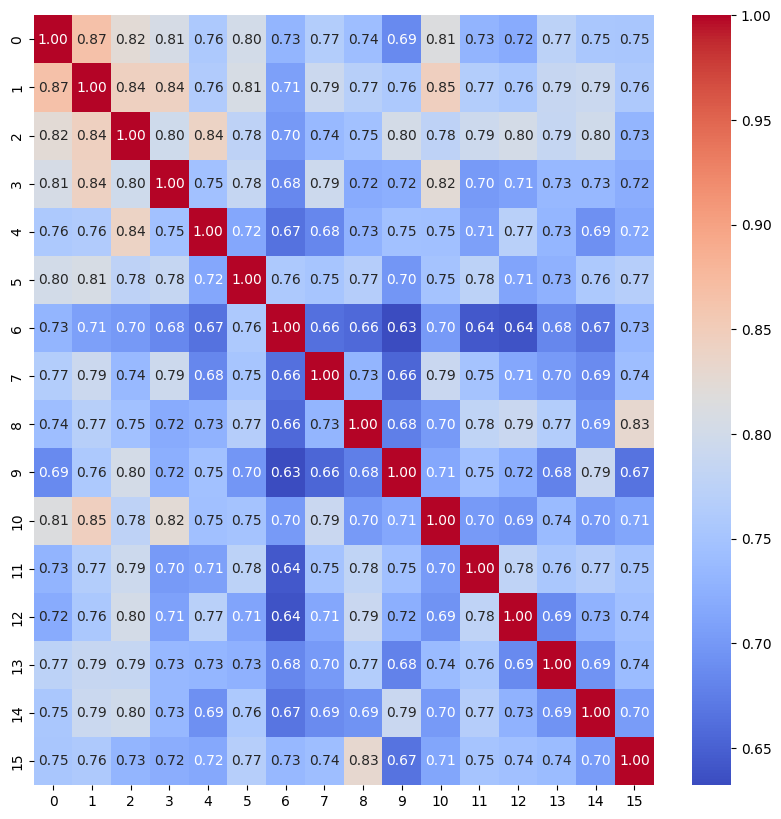

In [2]:
plt.figure(figsize=(10, 10))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="coolwarm")

print(f"Minimum similarity: {similarity_matrix.min()}")

In [3]:
type(similarity_matrix)

torch.Tensor